
# Radar Charts

* ``mplsoccer``, ``radar_chart`` module helps one to plot radar charts in a few lines of code.

* The radar-chart inspiration is [StatsBomb](https://twitter.com/StatsBomb/)
  and [Rami Moghadam](https://cargocollective.com/ramimo/2013-NBA-All-Stars)

* Here we will show some examples of how to use ``mplsoccer`` to plot radar charts.

We have re-written the [Soccerplots](https://github.com/Slothfulwave612/soccerplots)  Radar module
to enable greater customisation of the Radar. You can now set the edge color, decide the number of
concentric circles, and use hatching or path_effects.


In [19]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


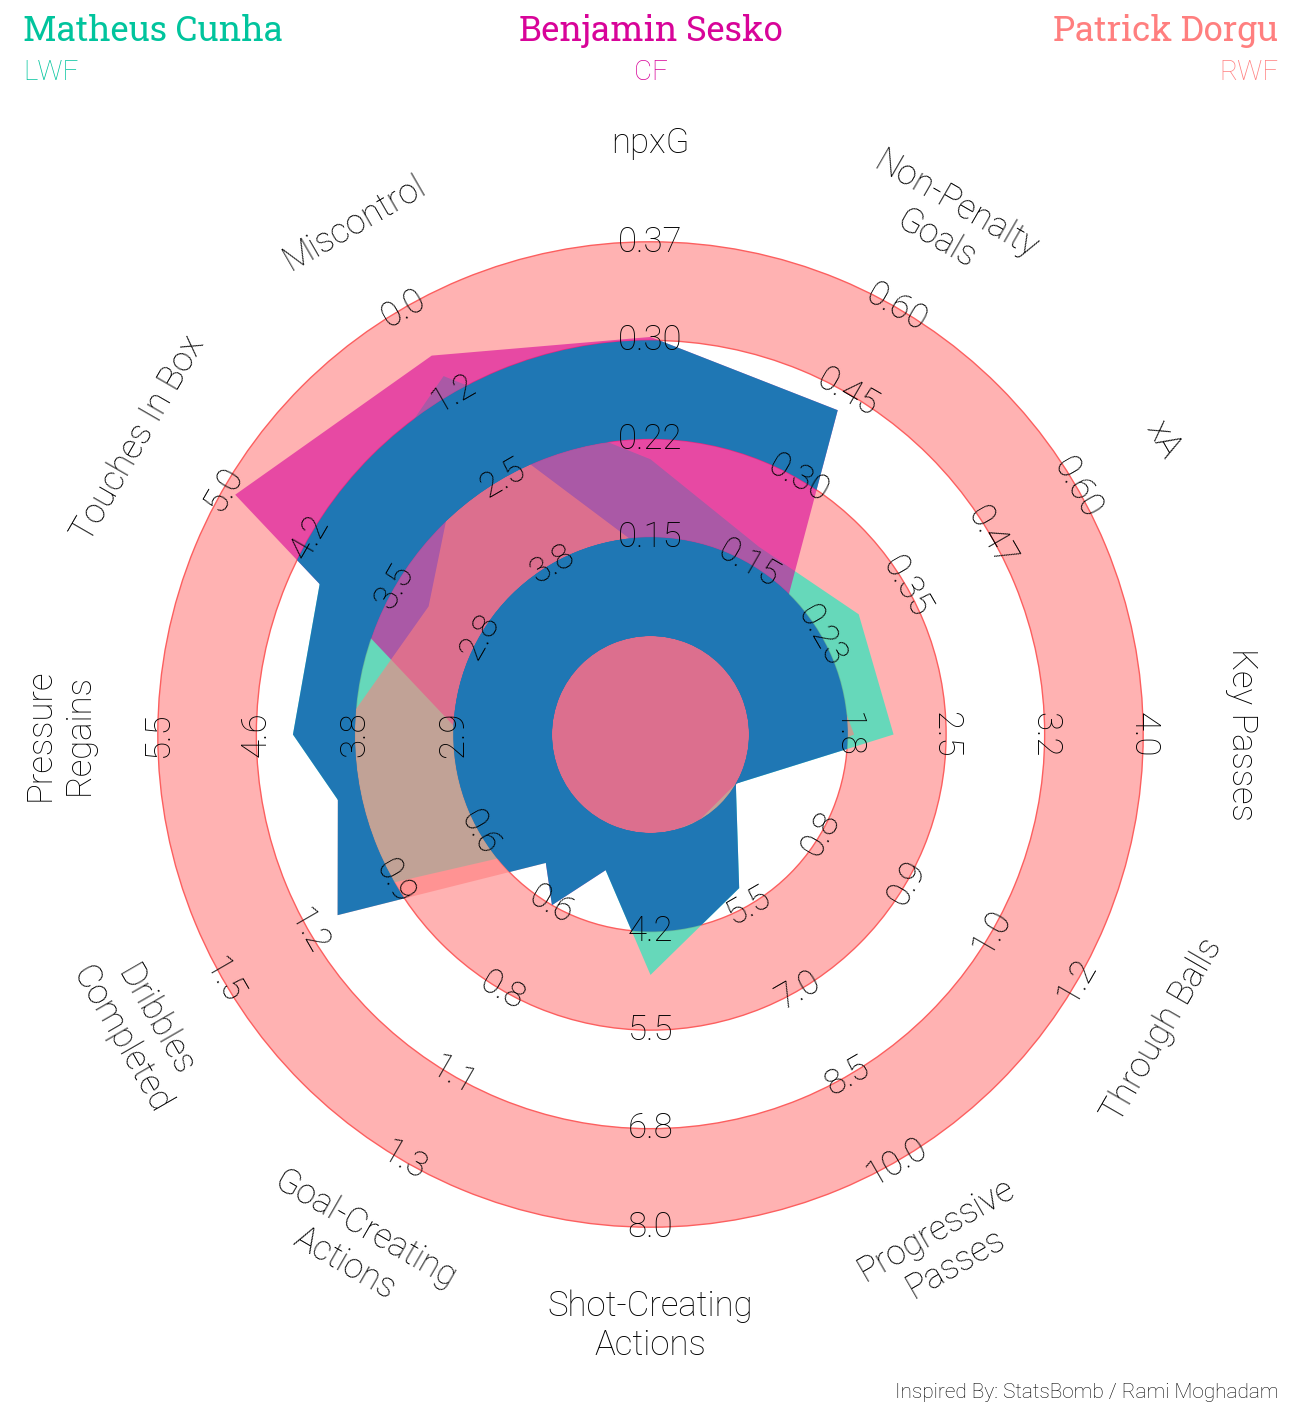

In [38]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

# ========================
# Parameter Radar
# ========================
params = [
    "npxG", "Non-Penalty Goals", "xA", "Key Passes",
    "Through Balls", "Progressive Passes",
    "Shot-Creating Actions", "Goal-Creating Actions",
    "Dribbles Completed", "Pressure Regains",
    "Touches In Box", "Miscontrol"
]

low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2, 0]
high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5, 5]

lower_is_better = ['Miscontrol']

# ========================
# Membuat Radar
# ========================
radar = Radar(
    params, low, high,
    lower_is_better=lower_is_better,
    round_int=[False]*len(params),
    num_rings=4,
    ring_width=1,
    center_circle_radius=1
)

# ========================
# Font
# ========================
URL1 = 'https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/SourceSerifPro-Regular.ttf'
serif_regular = FontManager(URL1)
URL2 = 'https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/SourceSerifPro-ExtraLight.ttf'
serif_extra_light = FontManager(URL2)
URL3 = 'https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/RubikMonoOne-Regular.ttf'
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = 'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf'
robotto_bold = FontManager(URL5)

# ========================
# Data Pemain
# ========================
cunha_values = [0.21, 0.18, 0.28, 2.10, 0.42, 5.20, 4.80, 0.35, 0.90, 4.30, 4.10, 1.00]
sesko_values = [0.30, 0.42, 0.15, 1.20, 0.20, 3.80, 3.10, 0.55, 0.40, 2.80, 4.90, 0.70]
dorgu_values = [0.14, 0.08, 0.22, 1.80, 0.35, 4.90, 3.60, 0.40, 1.10, 3.90, 3.20, 1.60]

# ========================
# Membuat Figure Grid
# ========================
fig, axs = grid(
    figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
    title_space=0, endnote_space=0, grid_key='radar', axis=False
)

# ========================
# Plot Radar
# ========================
radar.setup_axis(ax=axs['radar'])
radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')

# Plot Cunha
poly_cunha = radar.draw_radar(cunha_values, ax=axs['radar'], kwargs_radar={'facecolor':'#00f2c1','alpha':0.6})

# Plot Sesko
poly_sesko = radar.draw_radar(sesko_values, ax=axs['radar'], kwargs_radar={'facecolor':'#d80499','alpha':0.6})

# Plot Dorgu
poly_dorgu = radar.draw_radar(dorgu_values, ax=axs['radar'], kwargs_radar={'facecolor':'#ff7f7f','alpha':0.6})

# ========================
# Labels
# ========================
radar.draw_range_labels(ax=axs['radar'], fontsize=25, fontproperties=robotto_thin.prop)
radar.draw_param_labels(ax=axs['radar'], fontsize=25, fontproperties=robotto_thin.prop)

# ========================
# Title dan Endnote
# ========================
axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam',
                    fontsize=15, fontproperties=robotto_thin.prop, ha='right', va='center')

# Cunha
axs['title'].text(0.01, 0.75, 'Matheus Cunha', fontsize=25, color='#01c49d',
                  fontproperties=robotto_bold.prop, ha='left', va='center')
axs['title'].text(0.01, 0.25, 'LWF', fontsize=20,
                  fontproperties=robotto_thin.prop, ha='left', va='center', color='#01c49d')

# Sesko
axs['title'].text(0.5, 0.75, 'Benjamin Sesko', fontsize=25,
                  fontproperties=robotto_bold.prop, ha='center', va='center', color='#d80499')
axs['title'].text(0.5, 0.25, 'CF', fontsize=20,
                  fontproperties=robotto_thin.prop, ha='center', va='center', color='#d80499')

# Dorgu
axs['title'].text(0.99, 0.75, 'Patrick Dorgu', fontsize=25,
                  fontproperties=robotto_bold.prop, ha='right', va='center', color='#ff7f7f')
axs['title'].text(0.99, 0.25, 'RWF', fontsize=20,
                  fontproperties=robotto_thin.prop, ha='right', va='center', color='#ff7f7f')

plt.show()


## Adding lines from the center to the edge
add spokes from the radar center to the edge using ``Radar.spoke``.



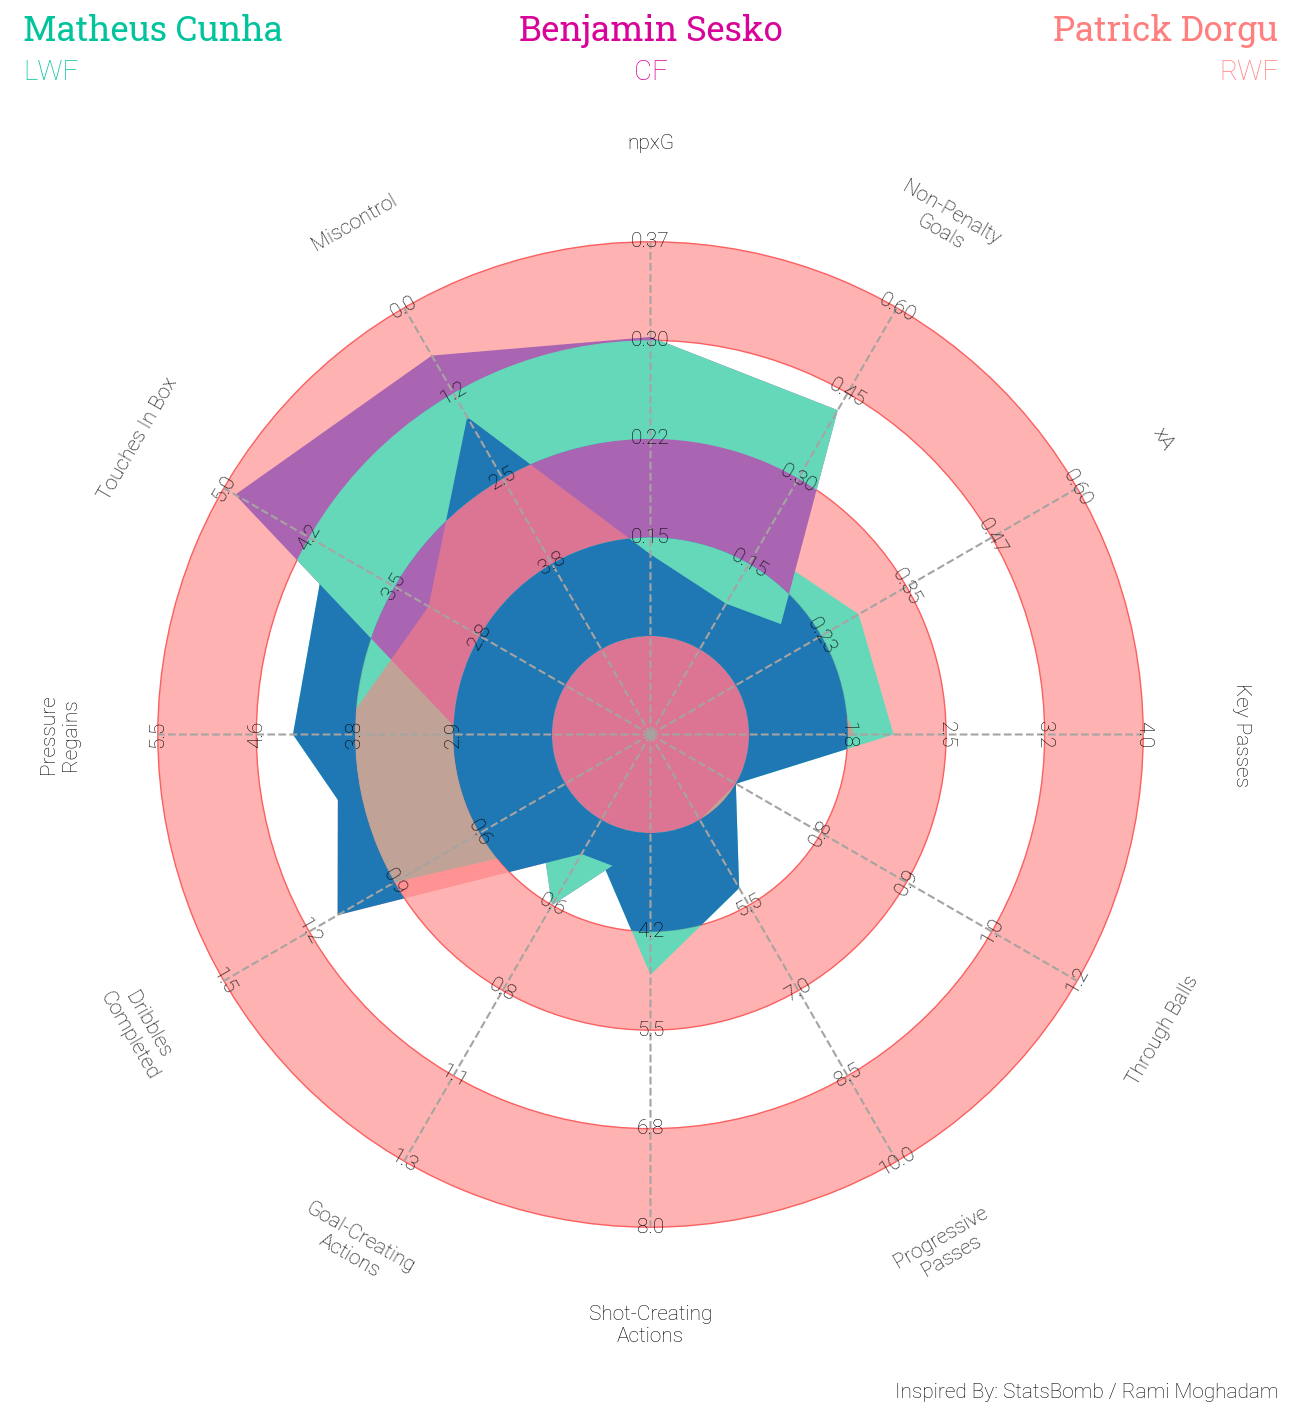

In [39]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

# ========================
# Parameter Radar
# ========================
params = [
    "npxG", "Non-Penalty Goals", "xA", "Key Passes",
    "Through Balls", "Progressive Passes",
    "Shot-Creating Actions", "Goal-Creating Actions",
    "Dribbles Completed", "Pressure Regains",
    "Touches In Box", "Miscontrol"
]

low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2, 0]
high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5, 5]
lower_is_better = ['Miscontrol']

# ========================
# Radar dan Font
# ========================
radar = Radar(
    params, low, high,
    lower_is_better=lower_is_better,
    round_int=[False]*len(params),
    num_rings=4,
    ring_width=1,
    center_circle_radius=1
)

URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = 'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf'
robotto_bold = FontManager(URL5)

# ========================
# Data Pemain
# ========================
cunha_values = [0.21, 0.18, 0.28, 2.10, 0.42, 5.20, 4.80, 0.35, 0.90, 4.30, 4.10, 1.00]
sesko_values = [0.30, 0.42, 0.15, 1.20, 0.20, 3.80, 3.10, 0.55, 0.40, 2.80, 4.90, 0.70]
dorgu_values = [0.14, 0.08, 0.22, 1.80, 0.35, 4.90, 3.60, 0.40, 1.10, 3.90, 3.20, 1.60]

# ========================
# Membuat Figure Grid
# ========================
fig, axs = grid(
    figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
    title_space=0, endnote_space=0, grid_key='radar', axis=False
)

# ========================
# Setup Axis Radar
# ========================
ax = axs['radar']  # menggunakan grid axis
radar.setup_axis(ax=ax)
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')

# ========================
# Plot Radar Pemain
# ========================
# Cunha
poly_cunha = radar.draw_radar(cunha_values, ax=ax, kwargs_radar={'facecolor':'#00f2c1','alpha':0.6})

# Sesko
radar_output = radar.draw_radar(sesko_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})
poly_sesko, rings_outer, vertices_sesko = radar_output

# Dorgu
poly_dorgu = radar.draw_radar(dorgu_values, ax=ax, kwargs_radar={'facecolor':'#ff7f7f','alpha':0.6})

# ========================
# Labels dan Spokes
# ========================
radar.draw_range_labels(ax=ax, fontsize=15, zorder=2.5, fontproperties=robotto_thin.prop)
radar.draw_param_labels(ax=ax, fontsize=15, fontproperties=robotto_thin.prop)
radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)

# ========================
# Title dan Endnote
# ========================
axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam',
                    fontsize=15, fontproperties=robotto_thin.prop, ha='right', va='center')

# Cunha
axs['title'].text(0.01, 0.75, 'Matheus Cunha', fontsize=25, color='#01c49d',
                  fontproperties=robotto_bold.prop, ha='left', va='center')
axs['title'].text(0.01, 0.25, 'LWF', fontsize=20,
                  fontproperties=robotto_thin.prop, ha='left', va='center', color='#01c49d')

# Sesko
axs['title'].text(0.5, 0.75, 'Benjamin Sesko', fontsize=25,
                  fontproperties=robotto_bold.prop, ha='center', va='center', color='#d80499')
axs['title'].text(0.5, 0.25, 'CF', fontsize=20,
                  fontproperties=robotto_thin.prop, ha='center', va='center', color='#d80499')

# Dorgu
axs['title'].text(0.99, 0.75, 'Patrick Dorgu', fontsize=25,
                  fontproperties=robotto_bold.prop, ha='right', va='center', color='#ff7f7f')
axs['title'].text(0.99, 0.25, 'RWF', fontsize=20,
                  fontproperties=robotto_thin.prop, ha='right', va='center', color='#ff7f7f')

plt.show()
